In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
%matplotlib inline

## Spliting
Genrando la partición de la muestra de entranamiento y de evaluación

In [3]:
X = np.random.normal(size=(25000,250))

In [4]:
Wt = np.random.normal(scale=0.3 , size=(250))

In [5]:
y = np.where(np.exp(X@Wt)>= 0.5, 1,0)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2,) #random_state=123)

In [7]:
X_train.shape

(20000, 250)

In [8]:
X_test.shape

(5000, 250)

## Definiendo la arquitectura de la red neuronal

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers

In [10]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.0 ,nesterov=True)
rmsprop = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
adagrad =  keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
adadelta = keras.optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
adam= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
nadam = keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

In [11]:
model = Sequential()

model.add(Dense(251, activation='tanh', input_shape=(250,)))

model.add(Dense(500, activation='linear'))

model.add(Dense(25, activation='softmax'))

model.add(Dense(1, activation='sigmoid'))

In [12]:
# Model output shape
model.output_shape

(None, 1)

In [13]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 251)               63001     
_________________________________________________________________
dense_2 (Dense)              (None, 500)               126000    
_________________________________________________________________
dense_3 (Dense)              (None, 25)                12525     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 201,552
Trainable params: 201,552
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Model config
# model.get_config()

In [15]:
# List all weight tensors 
# model.get_weights()

## Entrenando la RED

In [16]:
from keras.callbacks import History 
history = History()

In [17]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.fit(X_train, y_train,epochs=10, batch_size=1000, verbose=1,callbacks=[history],)

Epoch 1/10
20000/20000 [==============================] - 1s 73us/step - loss: 0.5797 - acc: 0.8568
Epoch 2/10
20000/20000 [==============================] - 1s 50us/step - loss: 0.5095 - acc: 0.9632
Epoch 3/10
20000/20000 [==============================] - 1s 49us/step - loss: 0.4905 - acc: 0.9774
Epoch 4/10
20000/20000 [==============================] - 1s 50us/step - loss: 0.4786 - acc: 0.9813
Epoch 5/10
20000/20000 [==============================] - 1s 47us/step - loss: 0.4673 - acc: 0.9868
Epoch 6/10
20000/20000 [==============================] - 1s 46us/step - loss: 0.4582 - acc: 0.9889
Epoch 7/10
20000/20000 [==============================] - 1s 45us/step - loss: 0.4497 - acc: 0.9903
Epoch 8/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.4420 - acc: 0.9909
Epoch 9/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.4341 - acc: 0.9916
Epoch 10/10
20000/20000 [==============================] - 1s 43us/step - loss: 0.4268 - acc: 0.9926

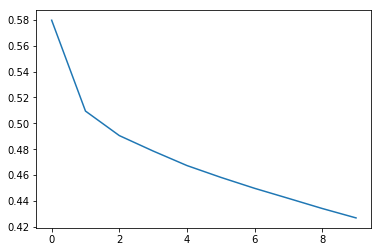

In [19]:
plt.plot(history.history["loss"])

In [20]:
y_train[:5]

array([0, 0, 0, 0, 1])

## Generando las predicciones

In [21]:
y_pred = model.predict_classes(X_test)
y_pred[:5]

array([[1],
       [1],
       [1],
       [0],
       [0]], dtype=int32)

In [22]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

5000/5000 [==============================] - 0s 98us/step
[0.4421419809818268, 0.963]


## Evaluando el modelo 

In [23]:
# Import the modules from `sklearn.metrics`
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score

# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[2129,  101],
       [  84, 2686]])

In [24]:
precision_score(y_test, y_pred)

0.9637603157517043

In [25]:
recall_score(y_test, y_pred)

0.9696750902527076

In [26]:
f1_score(y_test,y_pred)

0.966708655749505

In [27]:
cohen_kappa_score(y_test, y_pred)

0.9250710002899954

# Guardando los pesos

In [28]:
#model.save("models/Modelo 1")

In [29]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

5000/5000 [==============================] - 0s 90us/step
[0.4421419809818268, 0.963]


In [30]:
model.load_weights("models/Modelo 1")

In [31]:
score = model.evaluate(X_test, y_test,verbose=1)
print(score)

5000/5000 [==============================] - 0s 87us/step
[1.252629086112976, 0.513]
